# Análise preditiva - Câncer de Mama

Para realizarmos esta análise, iremos utilizar um dataset disponibilizado no site da UCI (https://archive.ics.uci.edu/ml/datasets.php)

## Descrição dos dados
Informações sobre os atributos:

1) ID número<br>
2) Diagnóstico (M = maligno, B = benigno)


Dez características de valor real são calculadas para cada núcleo celular:

a) raio (média das distâncias do centro aos pontos no perímetro)<br>
b) textura (desvio padrão dos valores da escala de cinza)<br>
c) perímetro<br>
d) área<br>
e) suavidade (variação local nos comprimentos dos raios)<br>
f) compacidade (perímetro ^ 2 / área - 1,0)<br>
g) concavidade (severidade das porções côncavas do contorno)<br>
h ) pontos côncavos (número de porções côncavas do contorno)<br>
i) simetria<br>
j) dimensão fractal ("aproximação da linha costeira" - 1)

In [50]:
# Importando bibliotecas necessárias
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Realizando a leitura dos dados
dados = read_csv('dados/bc_data.csv')
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# Análise Exploratória dos dados

In [ ]:
# Verificando a existência de valores Missing
# Podemos ver que não há nenhum valor Missing
# dados.isna().sum()

In [ ]:
# Verificando balanceamento dos dados da variável target
# Quando estamos utilizando classificação, os dados podem estar desbalanceado, por exemplo: podemos ter mais amostras
# de cancer maligno do que benigno de forma que a diferença entre as duas seja extremamente grande, isso pode afetar 
# a acuracidade do nosso algoritimo
dados.groupby('diagnosis').size()

In [3]:
# Iremos alterar a coluna diagnosis (diagnóstico) para valor numérico; sendo:
# 0 - Benigno
# 1 - Maligno
dados2 = dados
dados2['diagnosis'] = dados2['diagnosis'].map(lambda x: 0 if x == 'B' else 1)

# Verificando o resultado
dados2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
dados2.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

In [32]:
# Removendo coluna ID (A coluna ID serve apenas para identificação, não é relevante para o modelo)
del dados2['id']

In [13]:
# Calculando a correlação entre os dados
# O coeficiente de correlação varia de -1 a 1, sendo:
# -1 - uma correlação perfeitamente negativa
#  0 - não há correlação entre as variáveis
#  1 - correlação perfeitamente positiva 
correlacao = dados2.corr()

In [25]:
# Filtraremos as correlações que possuem valor superior a 0.6
corr = correlacao[correlacao['diagnosis'] > 0.6]
corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.082405,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
perimeter_worst,0.079986,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
area_worst,0.107187,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
concavity_worst,0.023203,0.659610,0.526911,0.301025,0.563879,0.512606,0.434926,0.816275,0.884103,0.752399,...,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511


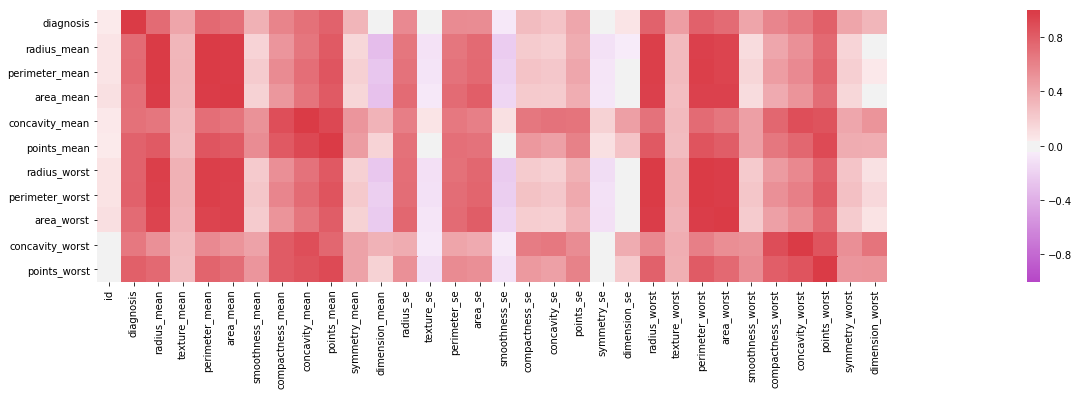

In [22]:
# Visualizando correlações com heatmap
f, ax = plt.subplots(figsize=(50,5))
sns.heatmap(corr, vmin= -1, vmax = 1, mask= np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(300, 10, as_cmap=True),
           square = True, ax = ax)

# Pré-processamento

## Escala dos Dados

A escala dos dados é uma das primeiras tarefas que devemos relalizar na fase de pre-processamento (tudo depende do algoritimo que iremos utilizar), esta etapa consistem em colocar os dados em uma mesma escala, com um range entre 0 e 1. Isso é bastante útil para algoritimos que utilizam medidas de distância.

In [48]:
# Importando biblioteca para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Salvando o nome das colunas 
coluna = dados2.columns

# Separando apenas os valores do dataset para normalização
dados
valores = dados2.values

# Separando o array criado em "Variaveis preditoras (X)" e "Variáveis target (Y)"
X = valores[:,1:]
Y = valores[:,0]

# Aplicando a função MinMaxScaler para normalização
# Iremos aplicar a normalização apenas para as variáveis preditoras, pois as variáveis
# target devem ser matidas para facilitar a compreensão

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# Printando resultados
print(rescaledX)

In [59]:
# Criando dataframe a partir dos dados normalizados e aplicando novamente os nomes das colunas
dados3 = DataFrame(rescaledX, columns= coluna[coluna != 'diagnosis'])

# Inserindo novamente a coluna Diagnosis (cujo os daods não foram alterados)
dados3['diagnosis'] = Y

In [61]:
# Convertendo a coluna Diagnosis para inteiro
dados3['diagnosis'] = dados3.diagnosis.map(lambda x: int(x))

In [65]:
# Verificando resultado
dados3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis
0,0.252686,0.090632,0.242278,0.135992,0.452920,0.154684,0.093416,0.183897,0.454040,0.201980,...,0.096482,0.182081,0.089437,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104,0
1,0.171281,0.312479,0.176145,0.086066,0.399476,0.292375,0.149649,0.131312,0.435354,0.314869,...,0.291045,0.138802,0.058887,0.331044,0.217530,0.153035,0.272371,0.271043,0.136626,0
2,0.192106,0.240785,0.187478,0.097434,0.497156,0.179928,0.071368,0.123260,0.330303,0.283067,...,0.384328,0.147019,0.070340,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910,0
3,0.203464,0.124450,0.201852,0.102354,0.575697,0.289001,0.108599,0.238370,0.359091,0.226622,...,0.099947,0.130086,0.061148,0.432741,0.150294,0.069241,0.295911,0.105855,0.083956,0
4,0.388518,0.118363,0.372193,0.241060,0.243748,0.153242,0.079499,0.132058,0.333838,0.115417,...,0.098881,0.269386,0.155795,0.273592,0.142048,0.108786,0.281031,0.181747,0.082776,0


# Machine Learning

In [101]:
# Importando KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation

# Realizando separação das variáveis preditoras e Target
valores = dados3.values
X = valores[:, 0:30]
Y = valores[:, 30]

# Definindo os valores para N° de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = cross_validation.KFold(n = num_instances, n_folds=num_folds, random_state=seed)

# Criando Modelo
modelo = KNeighborsClassifier()
resultado = cross_validation.cross_val_score(modelo, X, Y, cv=kfold, scoring='accuracy')

# Printando resultados
print("Acurácia: %.3f (%.3f)" %(resultado.mean(), resultado.std()))

Acurácia: 0.970 (0.021)


# Matriz de confusão

In [121]:
# Importando KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix


# Realizando separação das variáveis preditoras e Target
valores = dados3.values
X = valores[:, 0:30]
Y = valores[:, 30]

# Definindo tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = cross_validation.train_test_split(X,Y,
                                                                        test_size = teste_size,
                                                                        random_state = seed)

# Criação do modelo
model = KNeighborsClassifier()
model.fit(x_treino, y_treino)

# Fazendo previsões
previsoes = model.predict(x_teste)
matrix = confusion_matrix(y_teste, previsoes)

# Imprimindo matriz
print(matrix)

[[116   1]
 [  5  66]]


In [138]:
resultado = DataFrame(y_teste,previsoes).reset_index()
resultado.columns = [['CORRETO','PREDITO']]

In [139]:
# Previa dos dados
resultado.head()

,CORRETO,PREDITO
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
